                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales

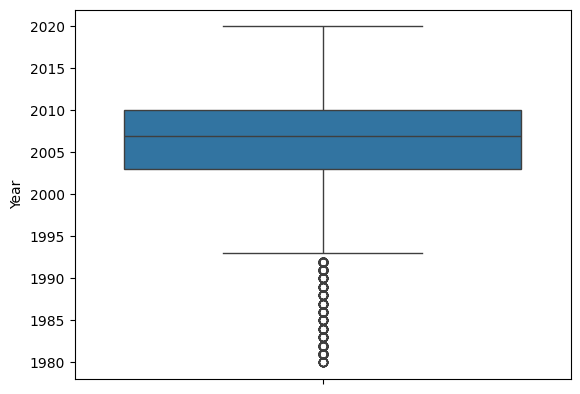

In [8]:
#importing the important stuff for data analytics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
#32 bees

def remove_outlier_IQR(VGdf):
    Q1=VGdf.quantile(0.25)
    Q3=VGdf.quantile(0.75)
    IQR=Q3-Q1
    df_final=VGdf[~((VGdf<(Q1-1.5*IQR)) | (VGdf>(Q3+1.5*IQR)))]
    return df_final

VGdf = pd.read_csv("Video_GamesA.csv")
NFdf = pd.read_csv("netflix_titles.csv")
REdf = pd.read_csv("reviews.csv")
HSdf = pd.read_csv("hotstar.csv")


sb.boxplot(y="Year_of_Release", data=VGdf)
plt.xticks(rotation=90)
plt.ylabel("Year")

print(VGdf)

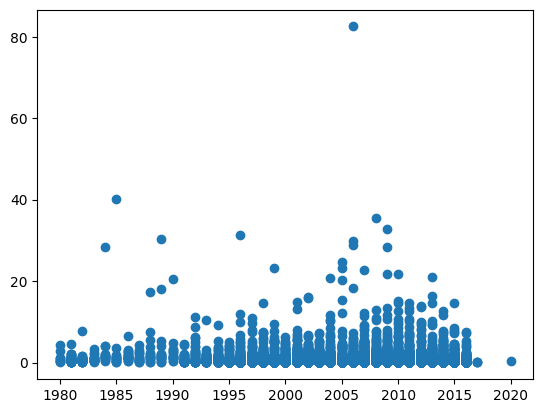

In [5]:
x = VGdf["Year_of_Release"]
y = VGdf["Global_Sales"]
plt.scatter(x, y)

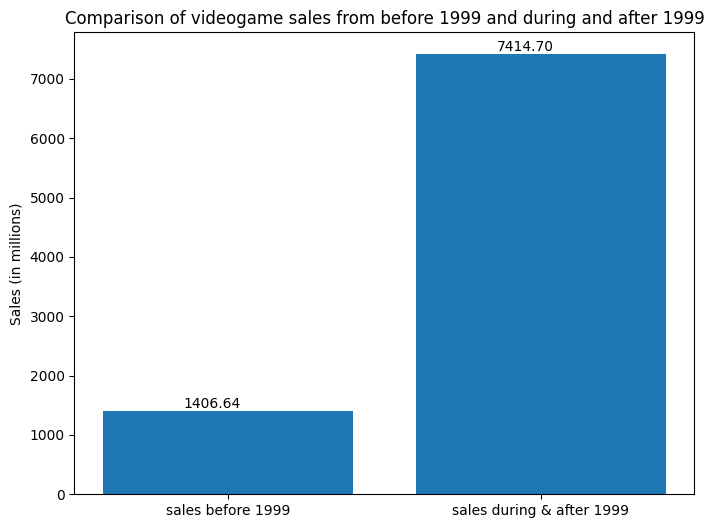

In [2]:
Early_VG = VGdf[VGdf["Year_of_Release"] < 1999]["Global_Sales"].sum()
Late_VG = VGdf[VGdf["Year_of_Release"] >= 1999]["Global_Sales"].sum()
#Early_Sales = Early_VG("Year_of_Release")["Global_Sales"].sum().values[0]
#Late_Sales = Late_VG("Year_of_Release")["Global_Sales"].sum().values[0]

plt.figure(figsize=(8, 6))
bars = plt.bar(["sales before 1999", "sales during & after 1999"], [Early_VG, Late_VG])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() /2 - 0.05, bar.get_height() + 0.05, f'{bar.get_height():.2f}', ha="center", va="bottom")
plt.ylabel("Sales (in millions)")
plt.title("Comparison of videogame sales from before 1999 and during and after 1999")
plt.show()

<Axes: xlabel='Year_of_Release'>

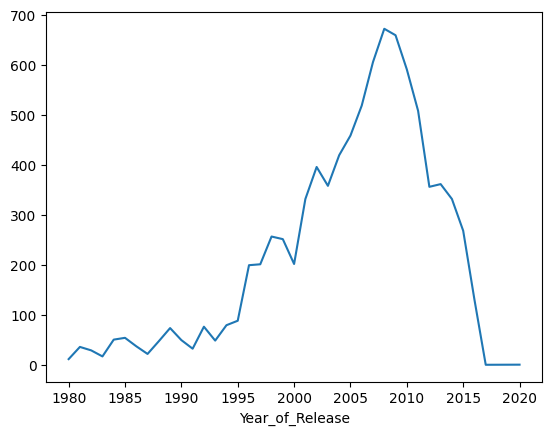

In [16]:
NoNull = VGdf.loc[VGdf["Year_of_Release"].notnull()]
newdf = NoNull.groupby("Year_of_Release")["Global_Sales"].sum()
newdf.plot()

<Axes: xlabel='Year_of_Release'>

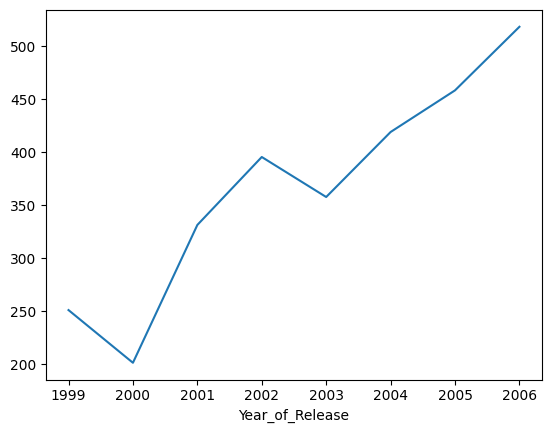

In [12]:
betYear = VGdf.loc[VGdf["Year_of_Release"].between(1999, 2006)]
newdf = betYear.groupby("Year_of_Release")["Global_Sales"].sum()
newdf.plot()

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_16692\3441226374.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=EarlYear, kind="bar", palette="muted", legend=True, ci=None)
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_16692\3441226374.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  k = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=MidYear, kind="bar", palette="muted", legend=True, ci=None)
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_16692\3441226374.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  h = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=MLYear, kind="bar", palette="muted", legend=True, ci=None)
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_16692\3441226374.py:11: FutureWarning: 

The `ci` parameter is

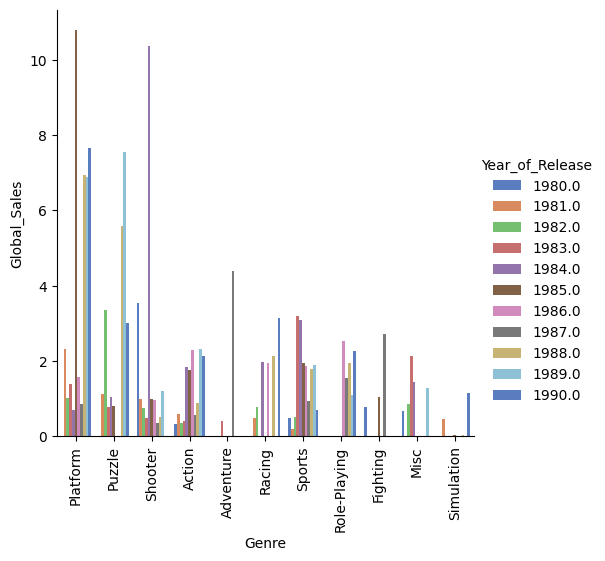

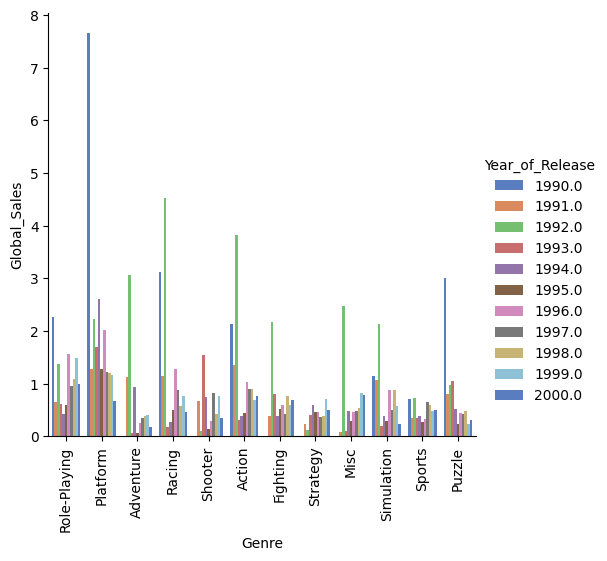

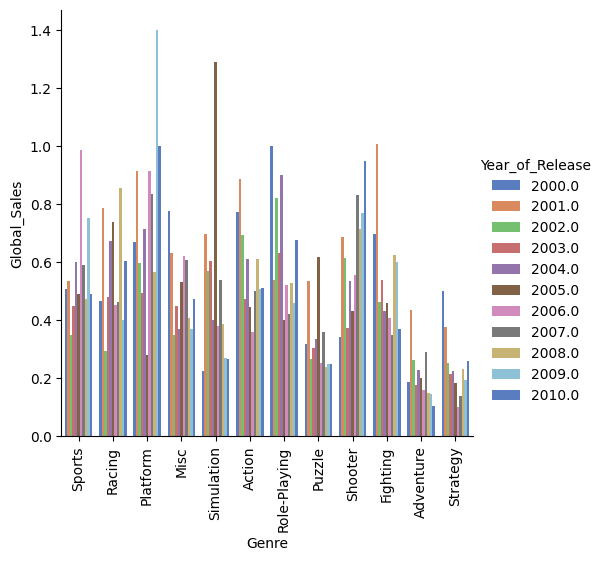

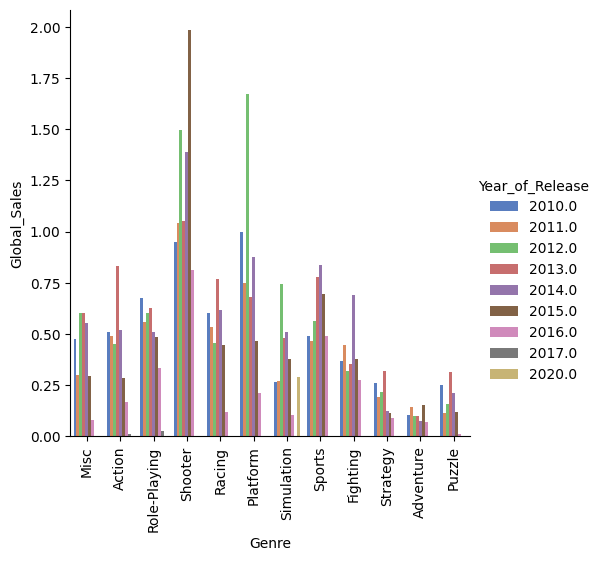

In [28]:
EarlYear = VGdf.loc[VGdf["Year_of_Release"].between(1980, 1990)]
MidYear = VGdf.loc[VGdf["Year_of_Release"].between(1990, 2000)]
MLYear  = VGdf.loc[VGdf["Year_of_Release"].between(2000, 2010)]
LateYear = VGdf.loc[VGdf["Year_of_Release"].between(2010, 2020)]
g = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=EarlYear, kind="bar", palette="muted", legend=True, ci=None)
g.tick_params(axis="x", rotation=90)
k = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=MidYear, kind="bar", palette="muted", legend=True, ci=None)
k.tick_params(axis="x", rotation=90)
h = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=MLYear, kind="bar", palette="muted", legend=True, ci=None)
h.tick_params(axis="x", rotation=90)
I = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=LateYear, kind="bar", palette="muted", legend=True, ci=None)
I.tick_params(axis="x", rotation=90)

plt.show()